# Linear Regression from First Principles  
## Stellar Luminosity as a Function of Mass
- Student: Juan José 
- Class: AREP

In this notebook we model stellar luminosity as a function of stellar mass using
a linear regression model implemented from first principles. No machine learning
libraries are used.


## Importing Required Libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7,5)


## Definition of the Stellar Dataset


In [3]:
# Stellar mass (solar masses)
M = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])

# Stellar luminosity (solar luminosities)
L = np.array([0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0])


## Dataset Visualization: Luminosity vs Stellar Mass


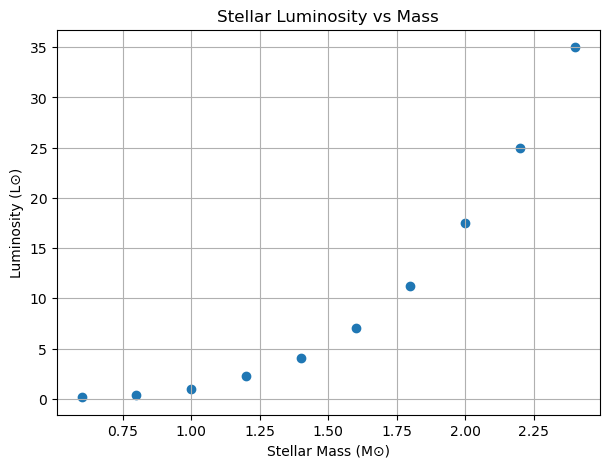

In [4]:
plt.scatter(M, L)
plt.xlabel("Stellar Mass (M⊙)")
plt.ylabel("Luminosity (L⊙)")
plt.title("Stellar Luminosity vs Mass")
plt.grid(True)
plt.show()


The relationship is clearly nonlinear, but a linear model provides a first-order
approximation to the mass–luminosity relation.


## Linear Model and Mean Squared Error Loss Function


In [5]:
def predict(M, w, b):
    return w * M + b

def mse(actual, predicted):
    return np.mean((actual - predicted)**2)


## Cost Function Surface over Model Parameters


In [7]:
w_vals = np.linspace(-20, 30, 100)
b_vals = np.linspace(-20, 20, 100)

W, B = np.meshgrid(w_vals, b_vals)
J = np.zeros_like(W)

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        pred = predict(M, W[i,j], B[i,j])
        J[i,j] = mse(L, pred)


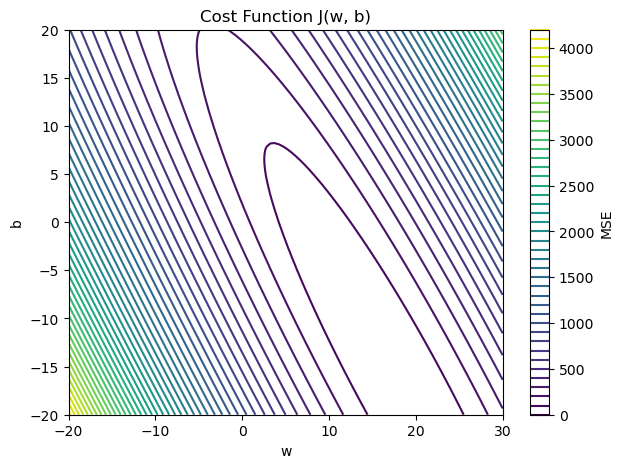

In [8]:
plt.contour(W, B, J, levels=50)
plt.xlabel("w")
plt.ylabel("b")
plt.title("Cost Function J(w, b)")
plt.colorbar(label="MSE")
plt.show()


The minimum of the cost surface corresponds to the optimal parameters that best
fit the data in the least-squares sense.


## Analytical Derivation of the Loss Gradients


The gradients of the MSE loss are:

∂J/∂w = (2/N) Σ (L̂ᵢ − Lᵢ) Mᵢ  
∂J/∂b = (2/N) Σ (L̂ᵢ − Lᵢ)

## Gradient Computation Using Explicit Loops


In [9]:
def gradients_loop(M, L, w, b):
    N = len(M)
    grad_w = 0.0
    grad_b = 0.0

    for i in range(N):
        pred = w * M[i] + b
        error = pred - L[i]
        grad_w += error * M[i]
        grad_b += error

    grad_w = (2/N) * grad_w
    grad_b = (2/N) * grad_b
    return grad_w, grad_b


## Vectorized Gradient Computation


In [10]:
def gradients_vectorized(M, L, w, b):
    N = len(M)
    pred = predict(M, w, b)
    error = pred - L
    grad_w = (2/N) * np.sum(error * M)
    grad_b = (2/N) * np.sum(error)
    return grad_w, grad_b


## Gradient Descent Training Procedure


In [11]:
def train(M, L, alpha=0.01, iterations=500):
    w, b = 0.0, 0.0
    loss_hist = []

    for _ in range(iterations):
        pred = predict(M, w, b)
        loss_hist.append(mse(L, pred))

        grad_w, grad_b = gradients_vectorized(M, L, w, b)
        w -= alpha * grad_w
        b -= alpha * grad_b

    return w, b, loss_hist


## Convergence Analysis for Different Learning Rates


α=0.001: w=6.775, b=1.579, final_loss=64.070
α=0.01: w=13.367, b=-8.943, final_loss=27.667
α=0.05: w=18.025, b=-16.660, final_loss=19.594


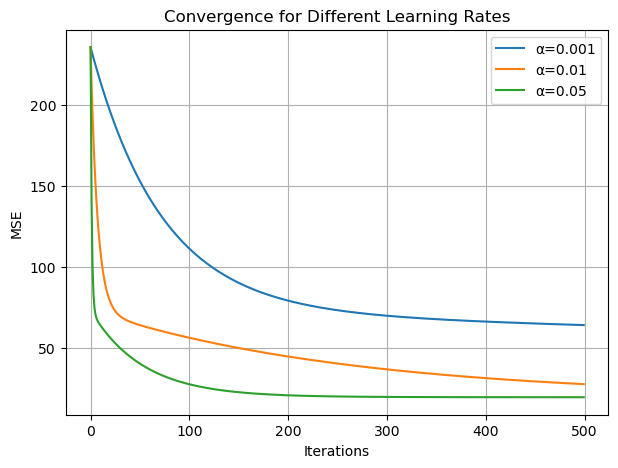

In [12]:
alphas = [0.001, 0.01, 0.05]

for alpha in alphas:
    w, b, loss_hist = train(M, L, alpha)
    print(f"α={alpha}: w={w:.3f}, b={b:.3f}, final_loss={loss_hist[-1]:.3f}")
    plt.plot(loss_hist, label=f"α={alpha}")

plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("Convergence for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()


## Final Model Fit and Systematic Error Analysis


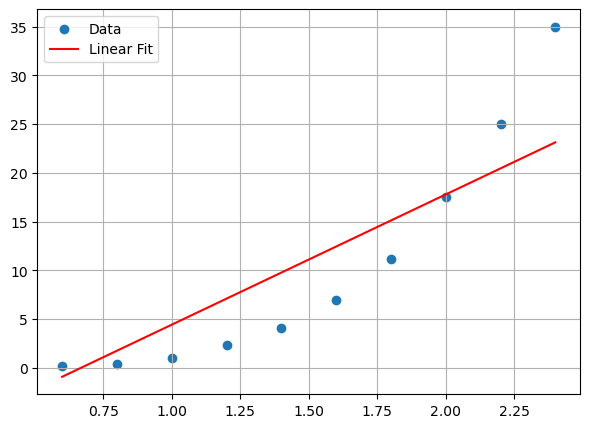

In [13]:
w, b, _ = train(M, L, alpha=0.01)

M_line = np.linspace(min(M), max(M), 100)
L_line = predict(M_line, w, b)

plt.scatter(M, L, label="Data")
plt.plot(M_line, L_line, color="red", label="Linear Fit")
plt.legend()
plt.grid(True)
plt.show()


## Conceptual and Astrophysical Interpretation


**Astrophysical meaning of w:**  
It represents the average increase in luminosity per unit stellar mass.

**Why is the linear model limited?**  
The stellar mass–luminosity relationship is fundamentally nonlinear and cannot
be captured accurately by a linear model.
